# <center>Oscilador Colpitts 
**Basado en el artículo [Nonlinear Dynamics of a BJT Based Colpitts Oscillator with Tunable Bias Current](https://www.ijeat.org/wp-content/uploads/papers/v2i5/E1662062513.pdf) de los autores Suvra Sarkar, Sandeepa Sarkar, Bishnu Charan Sarkar**

## Contexto: Artículo de Referencia 

El artículo análisa de forma numérica y experimental la diámica del oscilador Colpitts al variar la corriente DC del emisor o corriente bias de BJT, lo proponen como una posible forma de modulación de la señal caotica. Las ecuaciones se desprenden del circuito equivalente en AC(modelo de transconductancia), figura **b**, del circuito de la figura **a** 

<table><tr>
<td> <img src="./images/colpitts.png" alt="Drawing" title="adam solomon's hello" style="width: 400px;"/> </td>
<td> <img src="./images/ac_model.png" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>



En el desarrollo de las ecuaciones dinámicas del sistema consideran la relación entre $i_c$ y $v_{be}$ no lineal, donde los parámetros que los relacionan depende de la corriente bias $I$, apartir de esta conjetura relacionan la dinámica del oscilador Colppits con la corriente $I$.
Los autores para tomar valores que pueden ser reales para los párametros realizan varios experimentos variando la corriente $I$
<table><tr>
<td> <img src="./images/bias_current.png" alt="Drawing" title="adam solomon's hello" style="width: 400px;"/> </td>
<td> <img src="./images/table.png" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>

Los autores deciden poner la siguiente relación 

$$i_c = ag_{m10}v_{be} - bg_{m10}v^3_{b3} \tag{1}$$

donde $a$ y $b$ son los parámetros que dependen de la corriente $I$, $g_{m10}$ es la trans-conductancia del BJT con la corriente de polarización $I_0$ la cual fue escogida para que se presentaran oscilaciones sinusoidales. Los valores de $a$ y $b$  fueron ajustados usando los datos experimentales obtenidos.(Los valores escogidos para el experimento están espedificados en el [artículo de referencia](https://www.ijeat.org/wp-content/uploads/papers/v2i5/E1662062513.pdf))

## Descripción del sistema mediante ecuaciones diferenciales 
Como vemos tenemos tres elementos almacenadores de energía por lo que vamos a tener tres ecuaciones diferenciales.
Usando la ecuación $(1)$ las **ecuaciones diferenciales** que describen el sistema son:

$$
\begin{aligned}
\dot{v}_{c1} &= -\frac{i_L - g_{m1}v_{c2} + g_{m3}v^3_c2}{C_1}\\
\dot{v}_{c2} &= -\frac{i_L}{C_2} - \frac{v_{c2}}{h_{ie}C_2}\\
\dot{i}_L  &= \frac{v_{c1} + v_{c2}}{L} - \frac{Ri_L}{L}
\end{aligned}
$$

Donde $h_{ie}$ es la resistencia AC entre el emisor y la base del BJT.

Realizando las siguientes sustituciones

$\tau = \omega_0t,\ \omega^{-1}_0 =\sqrt{\frac{LC_1C_2}{C_1+C_2}}, \ x = \frac{v_{c1}}{v_T}, \ y = \frac{v_{c2}}{v_T}, \ z = \frac{i_L}{I_0}, \ h_r = \frac{L}{R(C_1+C_2)h_{ie}}, \ g = \frac{LI_0}{R(C_1+C_2)v_T}, \ Q = \frac{\omega_0L}{R}, \ k = \frac{C_2}{C_1+C_2}$

Donde $g$ es la ganancia del amplificador, $\omega_0$ es la frecuencia de resonancia y $Q$ es el factor de resonancia, $v_T$ es el voltaje equivalente de temperatura, obtnemos las siguientes ecuaciones de estado 

$$
\begin{aligned}
\dot{x} &= - \frac{g(z -ay +by^3)}{Q(1-k)} \\
\dot{y} &= -\frac{gz}{Qk} - \frac{h_ry}{Qk} \\
\dot{z} &= Qk(1-k)(x+y)\frac{1}{g} - \frac{z}{Q}
\end{aligned}
$$

## Análisis de Estabilidad 

In [3]:
from ipywidgets import interact, interactive,AppLayout
from IPython.display import clear_output, display, HTML

import numpy as np 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
from mpl_toolkits.mplot3d import axes3d
from scipy.integrate import solve_ivp

from sympy import var,nonlinsolve,Matrix,det,solve,simplify,factor

Sistema de ecuaciones diferenciales

In [4]:
x, y, z = var('x y z')
a,b,k,Q,hr,g = var('a b k Q h_r g')

f1 = -g*(z-a*y+b*y**3)/(Q*(1-k))
f2 = -g*z/(Q*k) - hr*y/(Q*k)
f3 = Q*k*(1-k)*(x+y)/g - z/Q

f = Matrix((f1,f2,f3))
f

Matrix([
[-g*(-a*y + b*y**3 + z)/(Q*(1 - k))],
[          -g*z/(Q*k) - h_r*y/(Q*k)],
[       Q*k*(1 - k)*(x + y)/g - z/Q]])

### Puntos de equilibrio

realizando un cambio de variable 
$n = \frac{h_r}{Q}$ y $m = \frac{g}{Q}$

In [5]:
n, m = var('n m')
f = f.subs([(hr/Q,n),(g/Q,m),(Q/g,1/m)])
f

Matrix([
[-m*(-a*y + b*y**3 + z)/(1 - k)],
[                -m*z/k - n*y/k],
[     k*(1 - k)*(x + y)/m - z/Q]])

Tenemos tres puntos fijos en el sistema

In [6]:
sols = nonlinsolve(f, (x, y,z))
sols

FiniteSet((0, 0, 0), (m*sqrt((a*m + n)/(b*m**3))*(-Q*k**2 + Q*k + n)/(Q*k*(k - 1)), m*sqrt((a*m + n)/(b*m**3)), -n*sqrt((a*m + n)/(b*m**3))), (m*sqrt((a*m + n)/(b*m**3))*(Q*k**2 - Q*k - n)/(Q*k*(k - 1)), -m*sqrt((a*m + n)/(b*m**3)), n*sqrt((a*m + n)/(b*m**3))))

### ¿Puntos estables o inestables?: Jacobiano

Un punto es estable si su parte real es menor a cero, de lo contrario el punto no es estable 

In [7]:
l1 = var('\lambda')
jacobiano = f.jacobian((x,y,z)) - l1*Matrix([[1,0,0], [0,1,0],[0,0,1]])
jacobiano

Matrix([
[   -\lambda, -m*(-a + 3*b*y**2)/(1 - k),     -m/(1 - k)],
[          0,             -\lambda - n/k,           -m/k],
[k*(1 - k)/m,                k*(1 - k)/m, -\lambda - 1/Q]])

recordar que lo anterior es valido cerca a los puntos de equilibrio 

### Eigenvalores

In [8]:
d=det(jacobiano)
d = -simplify(d)
d

\lambda**3 + \lambda**2*n/k + \lambda + a*m - 3*b*m*y**2 + n + \lambda**2/Q + \lambda*n/(Q*k)

de la ecuación anterior si hacemos $p = \frac{n}{k} + \frac{1}{Q},\ q = \frac{n}{Qk} + 1, \ r = am- 3bmy^2 +n$ tenemos la siguiente ecuación

$$\lambda^3 + p\lambda^2 + q\lambda +r$$

Usando el criterio de estabilidad de [Routh-Hurwitz](https://es.wikipedia.org/wiki/Teorema_de_Routh-Hurwitz)

$$ \begin{array}{c:ccc}
\lambda^3  & 1 & q & 0\\
\lambda^2  & p & r & 0\\
\lambda^1  & \frac{pq-r}{p} & 0 & 0 \\
\lambda^0  & r & 0 & 0
\end{array}$$

El criterio de Routh-Hurwitz nos dice que si existe un cambio de signo en la primera columna el sistema es inestable, entonces todo depende de los valores de $p$, $q$ y $r$

Recordando los valores de cada variable 

$$p = \frac{h_r}{Qk} + \frac{1}{Q}= \frac{1}{h_{ie}w_0C_2} + \frac{R}{w_0L}$$

$$q = \frac{h_r}{Q} + 1 = \frac{1}{h_{ie}(C_1+C_2)w_0} +1$$

$$r = (a - 3by^2)\frac{g}{Q} + \frac{h_r}{Q} = (a - 3by^2)\frac{I_0}{(C_1+C_2)v_Tw_0} + \frac{1}{(C_1+C_2)h_{ie}w_0}$$

Para los puntode de equilibrio encontrados en la sección [Puntos de equilibrio](#Puntos-de-equilibrio) vamos a ver como se comporta la estabilidad del sistema usando el criterio de [Routh-Hurwitz](https://es.wikipedia.org/wiki/Teorema_de_Routh-Hurwitz)

* Para todos los puntos es facil ver que $p$ y $q$ siempre son positivos 

* Para los puntos diferentes del origen tenemos que $r= -2a\frac{g}{Q} + (1-3b)\frac{h_r}{Q}$ siempre es menor a cero, por ende estos puntos ya son inestables 

* Para el punto situado en el origen $r = a\frac{g}{Q} + \frac{h_r}{Q}$ siempre es positivo 

* Para que el punto en el origen sea estable necesitamos que $pq-r$ sea mucho mayor a cero

**Resumiendo: el unico punto el cual podemos controlar o variar su estabilidad es el punto del origen**
El punto critico donde hay un cambio de estabilidad es 

$$a_c = \frac{h^2_r +kh_r}{Qkg} + \frac{h_r +k}{kg} - \frac{h_r}{g}$$

Los valores que se usaron en el [artículo referencia](https://www.ijeat.org/wp-content/uploads/papers/v2i5/E1662062513.pdf) y que se escogieron del experimento realizado son:

$$g = 1.32,\ Q=4.0 \ k=0.5 \ h_r=0.04 \ b=0.2$$

por lo tanto tenemos que

$$a_c = 0.79 $$

Si $a > a_c$ el punto de equilibrio en el origen se vuelve inestable 

**Los puntos estables para $a = 0.8$ son**

In [9]:
a,b,k,Q,hr,g = 0.8,0.2,0.5,4,0.04,1.32 #parámetros 

_x, _y, _z = var('x_ y_ z_')

f1 = -g*(_z -a*_y+b*_y**3)/(Q*(1-k))
f2 = -g*_z/(Q*k) - hr*_y/(Q*k)
f3 = Q*k*(1-k)*(_x+_y)/g - _z/Q
f = Matrix((f1,f2,f3))
puntos_equ = nonlinsolve((f1, f2,f3), (_x, _y,_z))
puntos_equ = np.array([sol for sol in puntos_equ]).astype(np.float64)
puntos_equ

array([[-2.05790199,  2.03752672, -0.06174323],
       [ 0.        ,  0.        ,  0.        ],
       [ 2.05790199, -2.03752672,  0.06174323]])

### Eigenvalores de cada punto 

In [25]:
l1 = var('\lambda')
jacobiano = f.jacobian((_x,_y,_z)) - l1*Matrix([[1,0,0], [0,1,0],[0,0,1]])

for i in puntos_equ:
    jacobiano_ev = jacobiano.subs(_y,i[1])#puntos_equ[0,1])
    d=det(jacobiano_ev)
    d = -simplify(d)
    sols =solve((d), (l1))
    print('coordenada:')
    print(i)
    print('eigenvalores: ')
    display(sols)
    print('Jacobiano:')
    display(f.jacobian((_x,_y,_z)).subs(_y,i[1]))
    print('\n')

coordenada:
[-2.05790199  2.03752672 -0.06174323]
eigenvalores: 


[0.422371030855182,
 -0.346185515427591 - 1.08516959731864*I,
 -0.346185515427591 + 1.08516959731864*I]

Jacobiano:


Matrix([
[                0,            -1.116, -0.66],
[                0,             -0.02, -0.66],
[0.757575757575758, 0.757575757575758,  -1/4]])



coordenada:
[0. 0. 0.]
eigenvalores: 


[-0.272455449864679,
 0.00122772493233955 - 1.00282974297185*I,
 0.00122772493233955 + 1.00282974297185*I]

Jacobiano:


Matrix([
[                0,             0.528, -0.66],
[                0,             -0.02, -0.66],
[0.757575757575758, 0.757575757575758,  -1/4]])



coordenada:
[ 2.05790199 -2.03752672  0.06174323]
eigenvalores: 


[0.422371030855182,
 -0.346185515427591 - 1.08516959731864*I,
 -0.346185515427591 + 1.08516959731864*I]

Jacobiano:


Matrix([
[                0,            -1.116, -0.66],
[                0,             -0.02, -0.66],
[0.757575757575758, 0.757575757575758,  -1/4]])

Utilizamos el la linealización que encontramos para graficar el flujo alrededor de los puntos de equilibrio 

In [12]:
def point_flow(t,state,y_):
    x,y,z = state   
    return np.dot(f.jacobian((_x,_y,_z)).subs(_y,y_),[x,y,z])

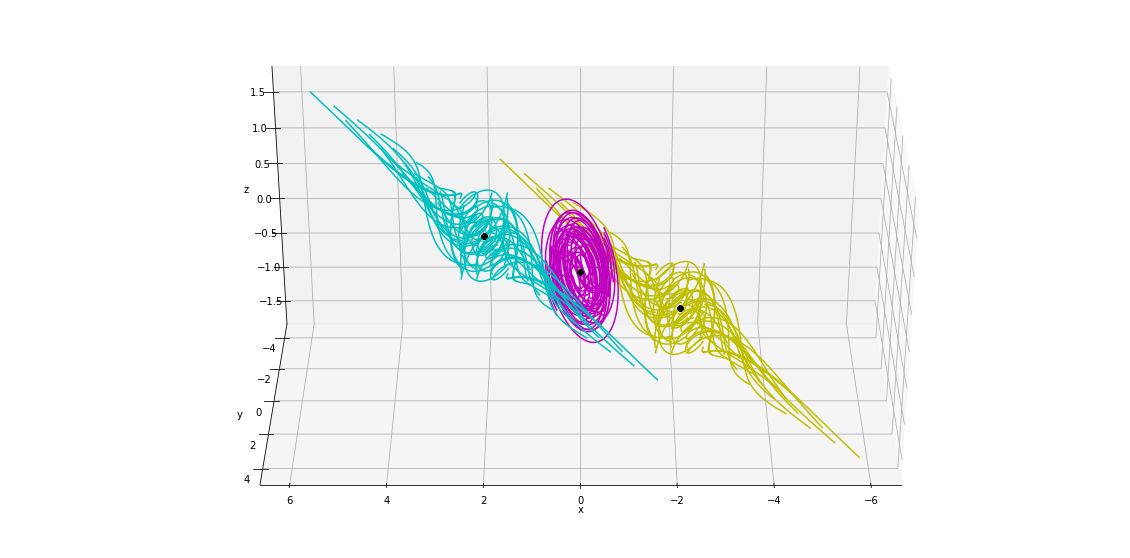

In [35]:
fig_eqs = plt.figure(figsize=(20,10))
ax_eqs = fig_eqs.gca(projection='3d')
ax_eqs.view_init(30,90)

tend,dt = 4,1e-1
t = np.arange(0,tend,dt)              
ds= 4
scale=0.5

def plot_flow_round(point,color_point,color_flow):
    for x0 in np.linspace(-scale,scale,ds):                       
        for y0 in np.linspace(-scale,scale,ds):               
            for z0 in np.linspace(-scale,scale,ds):  
                #ax_eqs.scatter(x0+point[0],y0+point[1],z0+point[2],c=color_point)
                ax_eqs.scatter(point[0],point[1],point[2],c='k')
                sol_eqs = solve_ivp(point_flow,[0,tend],[x0,y0,z0],args=[point[1]],t_eval=t)
                x = sol_eqs.y[0,:]+point[0]
                y = sol_eqs.y[1,:]+point[1]
                z = sol_eqs.y[2,:]+point[2]
                ax_eqs.plot3D(x,y,z,color=color_flow)
    ax_eqs.set_xlabel('x')
    ax_eqs.set_ylabel('y')
    ax_eqs.set_zlabel('z')
    
plot_flow_round(puntos_equ[0,:],color_point = 'r',color_flow = 'y')
plot_flow_round(puntos_equ[1,:],color_point = 'b',color_flow = 'm') 
plot_flow_round(puntos_equ[2,:],color_point = 'g',color_flow = 'c')

como se puede ver todos los puntos con un valor de $a=0.8$ son inestables aunque se presenta un cyclo límite en el punto de origen.

Como se puede ver en la simulación verca a los puntos de equilibrio tenemos lo siguiente 
<table><tr>
<td> <img src="./images/seadle.jpg" alt="Drawing" title="adam solomon's hello" style="width: 250px;"/> </td>
<td> <img src="./images/cycle.jpg" alt="Drawing" title="adam solomon's hello" style="width: 250px;"/> </td>
</tr></table>

La imagen de la izquierda representa el comportamiento para los puntos a los extremos, mientras que la figura de la derecha el del centro, esta última imagen es para cuando $a>a_c$, al variar el parámetro $a$ lo que cambiaria sería que desapareceria el ciclo y todos los puntos iran hacia el centro



## Simulacíon 

### Definición del Sistema de ecuaciones 

In [9]:
def colpitts_(t,xyz,a,b,k,Q,hr,g):
    x,y,z = xyz
    return [-g*(z-a*y+b*y**3)/(Q*(1-k)),-g*z/(Q*k) -hr*y/(Q*k),  Q*k*(1-k)*(x+y)/g - z/Q]

### Simulación para una sola condición incial y sin varación de parametros 

Text(0.05, 0.95, 'Espacio de Estados')

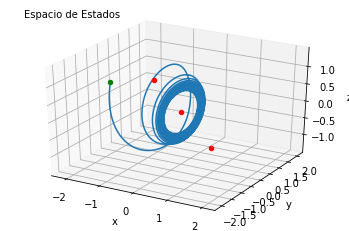

In [10]:
time = (0,100)
t = np.arange(0,100,0.01)
ini_condi = [-2.1,0,0.5] #condiciones iniciales 
solucion = solve_ivp(colpitts_,time,ini_condi,args =[a,b,k,Q,hr,g], t_eval = t)
x,y,z= solucion.y[0,:],solucion.y[1,:],solucion.y[2,:]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot3D(x,0*y,z)
#punto inicial 
ax.scatter(ini_condi[0],ini_condi[1],ini_condi[2],c='g')
#puntos de equilibrio 
for i,sol in enumerate(puntos_equ):
    ax.scatter(sol[0],sol[1],sol[2],c='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.text2D(0.05, 0.95, "Espacio de Estados", transform=ax.transAxes)


Text(0.5, 0, 't')

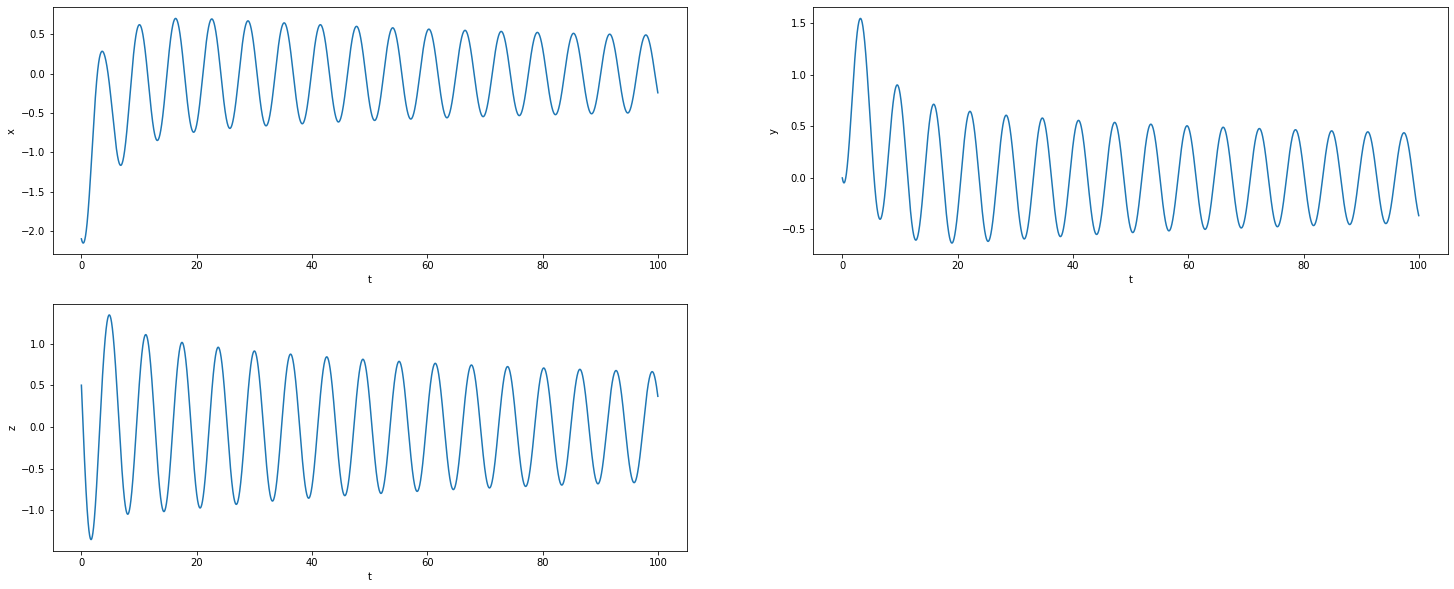

In [11]:
plt.figure(figsize=(25,10))

plt.subplot(2,2,1)
plt.plot(t,x)
plt.ylabel('x')
plt.xlabel('t')

plt.subplot(2,2,2)
plt.plot(t,y)
plt.ylabel('y')
plt.xlabel('t')

plt.subplot(2,2,3)
plt.plot(t,z)
plt.ylabel('z')
plt.xlabel('t')

## Simulación Interactiva

In [36]:
def solve_Colppits(x_p=0,y_p=-2.50,z_p=0.8,
                   N=10,angle2=-174, angle=238.,zoom=-1.0, max_time=36.0,a=0.9):

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('on')

    # prepare the axes limits
    ax.set_xlim((-3-zoom, 3+zoom))
    ax.set_ylim((-3-zoom, 3+zoom))
    ax.set_zlim((-3-zoom, 3+zoom))
    for i,sol in enumerate(puntos_equ):
        ax.scatter(sol[0],sol[1],sol[2])
    
    def colpitts_(t,xyz,a,b,k,Q,hr,g):
        x,y,z = xyz
        return [-g*(z-a*y+b*y**3)/(Q*(1-k)),-g*z/(Q*k) -hr*y/(Q*k),  Q*k*(1-k)*(x+y)/g - z/Q]
    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = np.random.random((N, 3))
    x0[:,0]= x0[:,0]+x_p
    x0[:,1]= x0[:,1]+y_p
    x0[:,2]= x0[:,2]+z_p
    
    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))

    time = (0,max_time)
    x_t = np.asarray([solve_ivp(colpitts_,time,ini_condi,args =[a,b,k,Q,hr,g], t_eval = t).y for ini_condi in x0])

    colors = plt.cm.jet(np.linspace(0, 1, N))

    for i in range(N):
        x = x_t[i,0,:]
        y = x_t[i,1,:]
        z = x_t[i,2,:]
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(angle2, angle)
    plt.show()

    return t, x_t

In [37]:
w = interactive(solve_Colppits,angle2=(0.,180.),angle=(0.,180.),zoom=(-2.,10.),
                max_time=(0.1,1000.), N=(1,50),a=(0.,5.),x_p=(-4.,4.),y_p=(-4.,4.),z_p=(-4.,4.))
display(w)

interactive(children=(FloatSlider(value=0.0, description='x_p', max=4.0, min=-4.0), FloatSlider(value=-2.5, de…

## Diagrama de Bifurcaciones

En esta sección se va visualizar el diagrama de bifurcaciones del sistema, por facilidad de visualización y de computación se divide el diagradama en dos tramos, uno con mayor resolución del parámetro $a$ y otro con menos 

In [15]:
time = (0,1000)
t = np.arange(0,1000,0.05)
ini_condi = [-1,1,1] #condiciones iniciales 

def event_lorenz(t,xyz,a,b,k,Q,hr,g):
    x,y,z = xyz
    return x+y

event_lorenz.direction = -1

Text(0, 0.5, 'Z pico')

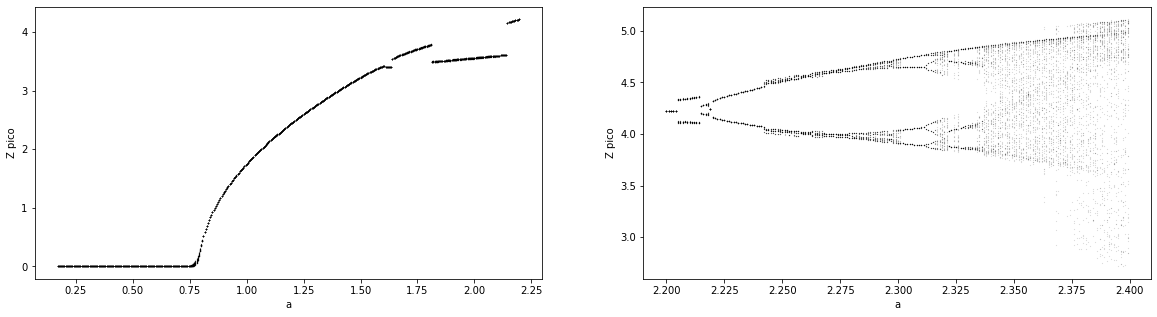

In [16]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
rs = np.arange(0,2.2,0.005)
for r in rs:
    solucion = solve_ivp(colpitts_,time,ini_condi,events=[event_lorenz],args =[r,b,k,Q,hr,g], t_eval = t)
    for i,t_ in enumerate(solucion.t_events[0]):
        if t_>500 : #esperamos a que pase el transiotorio 
            plt.plot(r,solucion.y_events[0][i,2],'.k',markersize=0.1)
    init_condi = solucion.y[:,-1]

plt.xlabel('a')
plt.ylabel('Z pico')
    
plt.subplot(1,2,2)
rs = np.arange(2.2,2.4,0.001)
for r in rs:
    solucion = solve_ivp(colpitts_,time,ini_condi,events=[event_lorenz],args =[r,b,k,Q,hr,g], t_eval = t)
    for i,t_ in enumerate(solucion.t_events[0]):
        if t_>500 :
            plt.plot(r,solucion.y_events[0][i,2],'.k',markersize=0.3)
    init_condi = solucion.y[:,-1]
    
plt.xlabel('a')
plt.ylabel('Z pico')

Como se puede ver en las figuras a medida que se hace mas grande el parámetro $a$ se va creando más y más periodos hasta que se llega al caos 

## Referencias 
* [Sarkar, Suvra & Sarkar, Sandeepa & Sarkar, Bishnu Charan. (2013). Nonlinear Dynamics of a BJT Based Colpitts Oscillator with Tunable Bias Current. International Journal of Engineering and Advanced Technology](https://www.ijeat.org/wp-content/uploads/papers/v2i5/E1662062513.pdf)
* [Estabilidad de un sistema de control](https://dademuch.com/2018/03/15/estabilidad-de-un-sistema-de-control/)
* [Routh-Hurwitz](https://es.wikipedia.org/wiki/Teorema_de_Routh-Hurwitz)